# Sweetness Prediction using lasso and ridge

In [81]:
# loading libraries 
library(glmnet)
library(caTools)
set.seed(123)

In [82]:
# Reading data
sp <- read.csv("C:/Users/Shubham Shukla/Desktop/internship/new/sweetness_prediction/ecfp.csv")

In [83]:
# Splitting data into training and testing set

split <- sample.split(sp$Sweetness, SplitRatio = 0.75)
train <- subset(sp, split == T)
test <- subset(sp, split == F)

In [84]:
train <- subset(train, select = -c(smiles))

In [85]:
test <- subset(test, select = -c(smiles))

In [86]:
testx <- model.matrix(Sweetness ~. -1, data = test)
testy <- test$Sweetness

In [87]:
# Converting into matrix 

x <- model.matrix(Sweetness ~. -1, data = train)
y <- train$Sweetness

### Using ridge

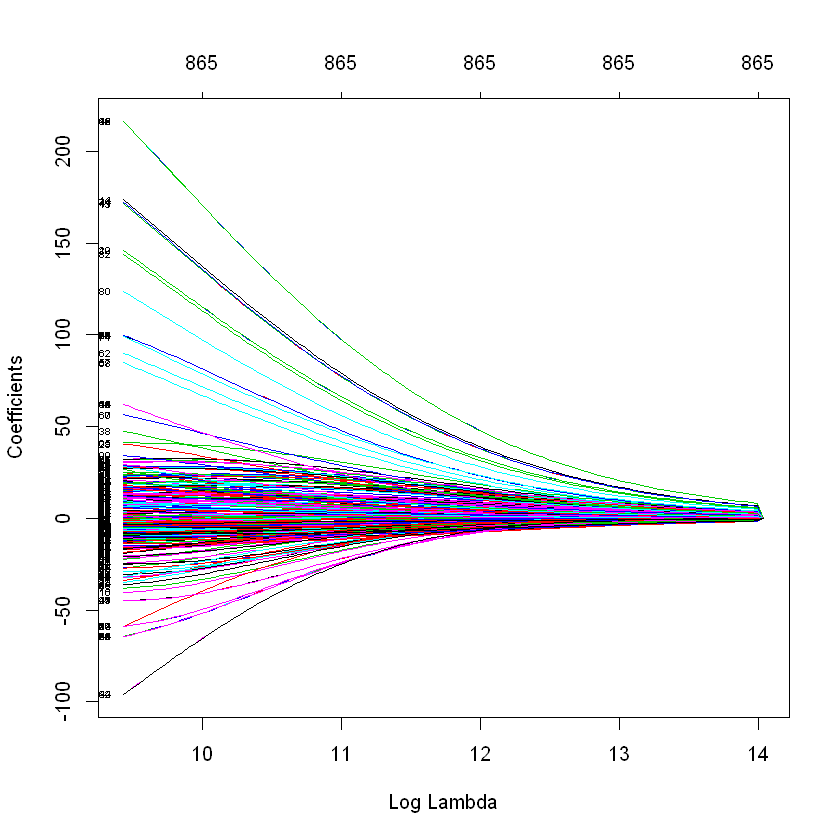

In [88]:
fit.ridge <- glmnet(x,y, alpha = 0)
plot(fit.ridge, xvar = "lambda", label = T)

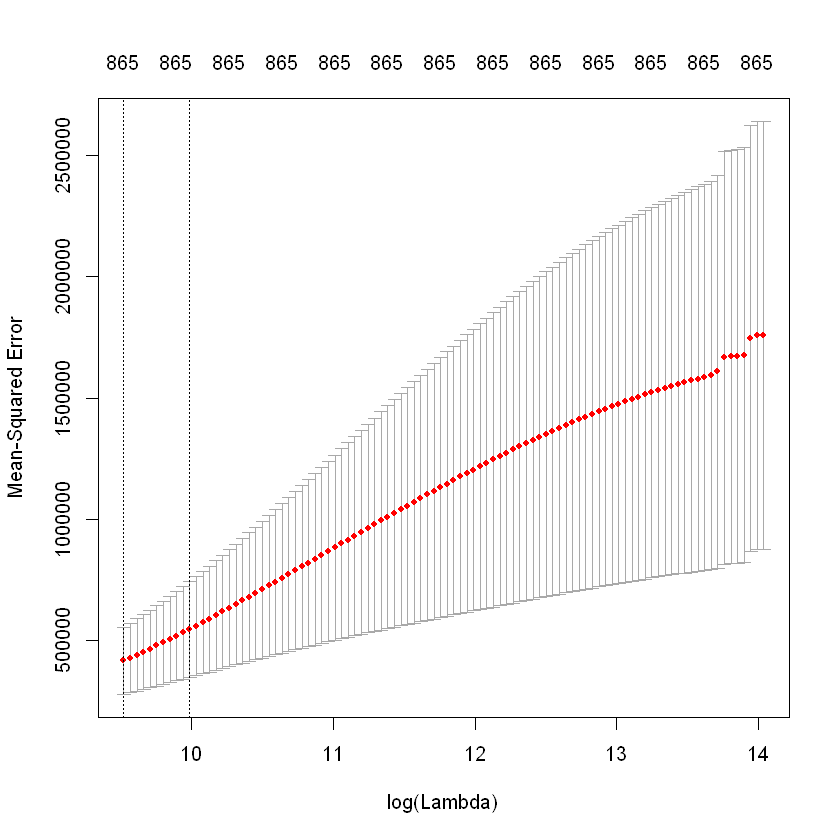

In [89]:
# CV for ridge 

cv.ridge <- cv.glmnet(x,y, alpha = 0)
plot(cv.ridge)

### Using lasso

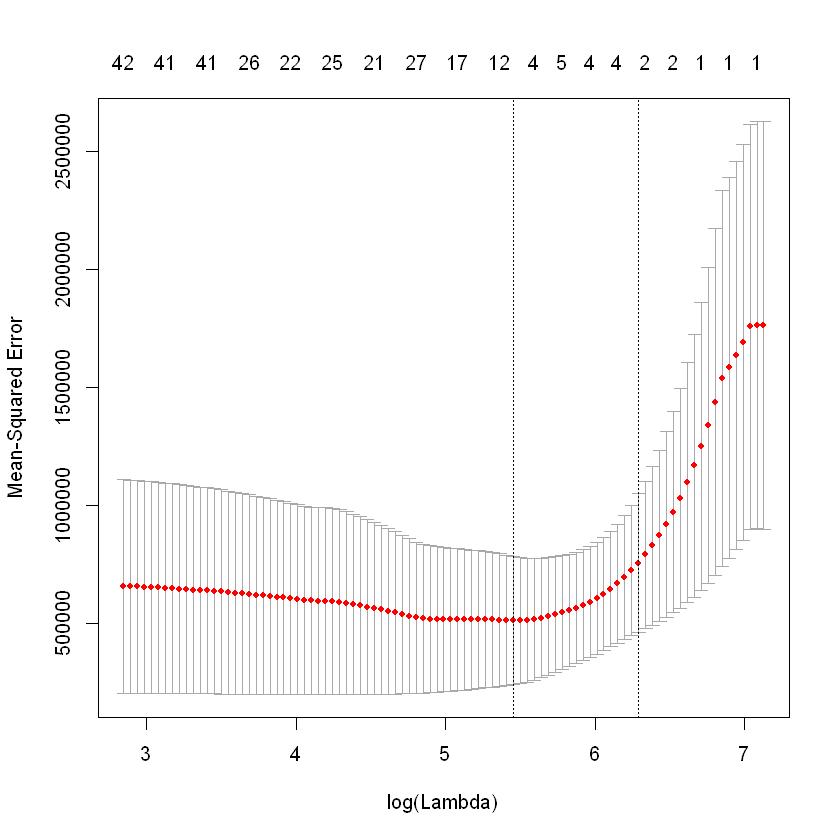

In [90]:
cv.lasso <- cv.glmnet(x,y, alpha = 1, nlambda = 100)
plot(cv.lasso)

In [91]:
# Model fitting using lasso 

fit <- glmnet(x,y, alpha = 1, lambda = cv.lasso$lambda.1se)

In [92]:
fit


Call:  glmnet(x = x, y = y, alpha = 1, lambda = cv.lasso$lambda.1se) 

     Df   %Dev Lambda
[1,]  2 0.7332  540.2

In [93]:
model.predict <- predict(fit,testx)
nrow(model.predict)

[1] 44

In [94]:
sse <- sum((model.predict - testy)^2)
sst <- sum((testy - mean(y))^2)

r_sq <- 1 - (sse/sst)

In [95]:
r_sq

[1] 0.801073

# Log(Sweetness) Model

In [96]:
# Taking log of Sweetness

log_y <- log10(y)

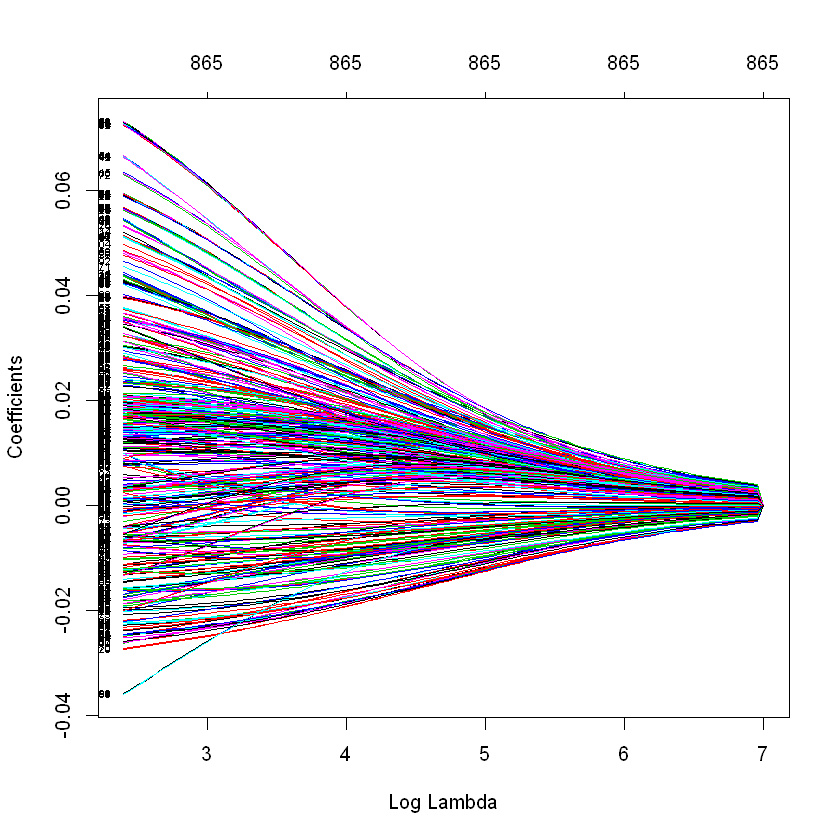

In [97]:
# Using ridge

log.fit.ridge <- glmnet(x,log_y, alpha = 0)
plot(log.fit.ridge, xvar = "lambda", label = T)

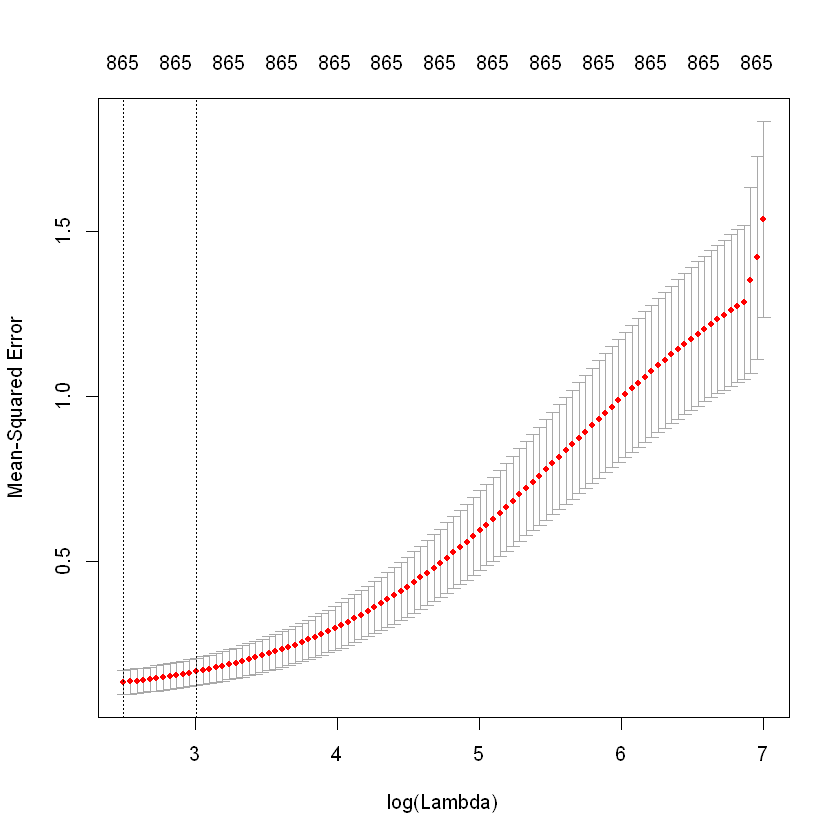

In [98]:
# CV for ridge 

log.cv.ridge <- cv.glmnet(x,log_y, alpha = 0)
plot(log.cv.ridge)

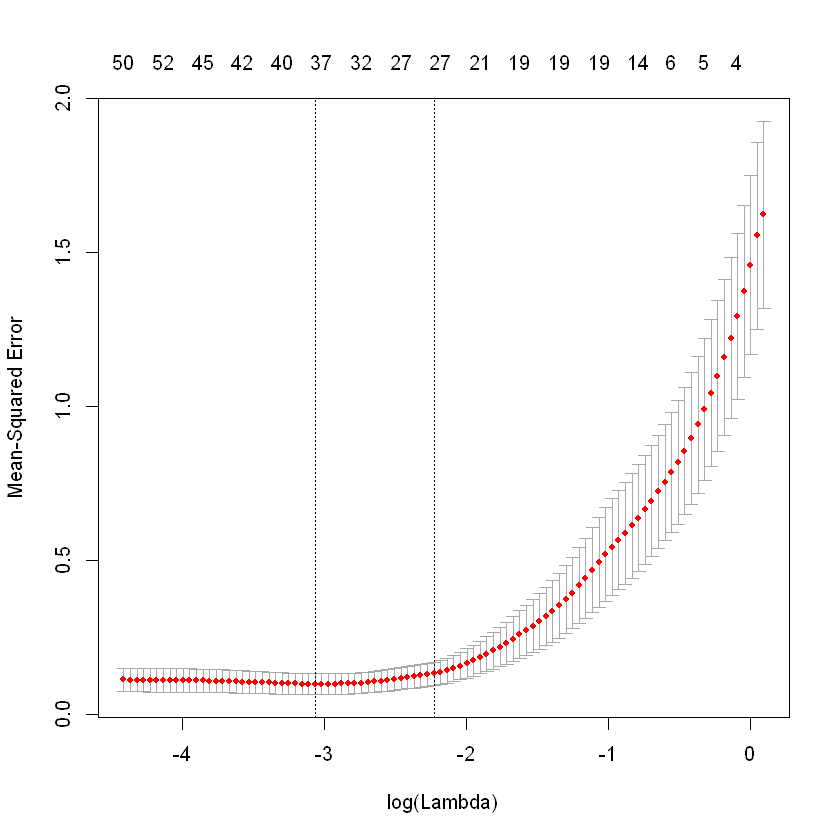

In [99]:
# Using lasso for log sweetness

log.cv.lasso <- cv.glmnet(x,log_y, alpha = 1, nlambda = 100)
plot(log.cv.lasso)

In [100]:
# Model fitting using lasso 

log.fit <- glmnet(x,log_y, alpha = 1, lambda = log.cv.lasso$lambda.1se)
log.fit


Call:  glmnet(x = x, y = log_y, alpha = 1, lambda = log.cv.lasso$lambda.1se) 

     Df   %Dev Lambda
[1,] 24 0.9621 0.1078

In [101]:
# prediction using test set

log.predict <- predict(log.fit, testx)

In [102]:
log.testy <- log10(testy)

In [103]:
# Calculating r_sq for log(sweetness)

sse <- sum((log.testy - log.predict)^2)
sst <- sum((log.testy - mean(log_y))^2)

log_r_sq <- 1 - (sse/sst)

In [104]:
log_r_sq

[1] 0.9561287

In [105]:
data.frame(log.testy, log.predict)

,log.testy,s0
5,2.4771213,2.3639646
10,-0.3979400,-0.2997136
13,2.4771213,2.1793483
14,2.3979400,1.2157159
20,2.2041200,2.2708254
21,2.2041200,2.2708254
25,-0.3979400,-0.2997136
31,-0.3979400,-0.2997136
40,-0.8239087,-0.5985428
45,-0.8239087,-0.5985428


In [106]:
sse
sst

[1] 2.369618

[1] 54.01293